# Normalization and Standatdization

In [2]:
import pandas as pd

df = pd.read_csv('Churn_Modelling.csv', sep=';')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(9865, 14)

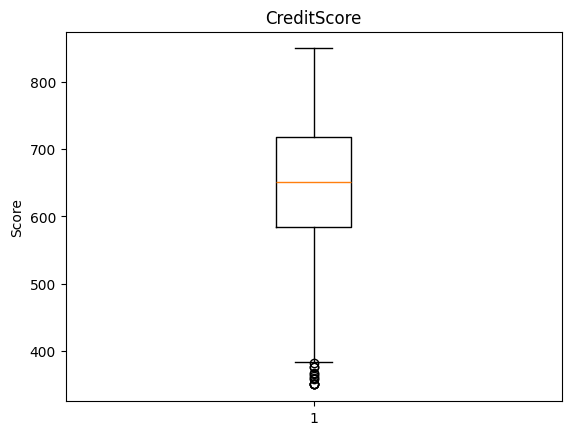

In [5]:
import matplotlib.pyplot as plt

plt.boxplot(df['CreditScore'])
plt.title('CreditScore')
plt.ylabel('Score')
plt.show()

In [6]:
print(df['CreditScore'].min())
print(df['CreditScore'].max())

350
850


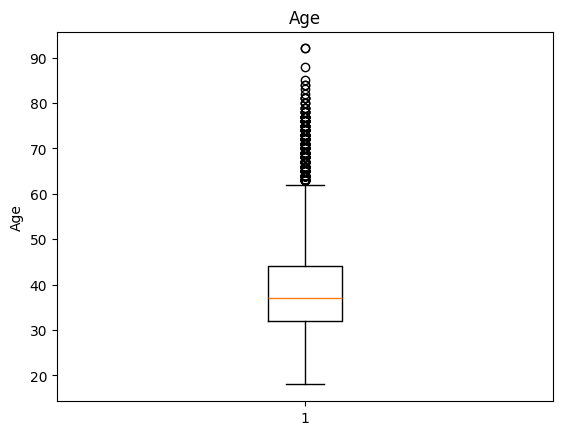

In [7]:
import matplotlib.pyplot as plt

plt.boxplot(df['Age'])
plt.title('Age')
plt.ylabel('Age')
plt.show()

In [8]:
print(df['Age'].min())
print(df['Age'].max())

18
92


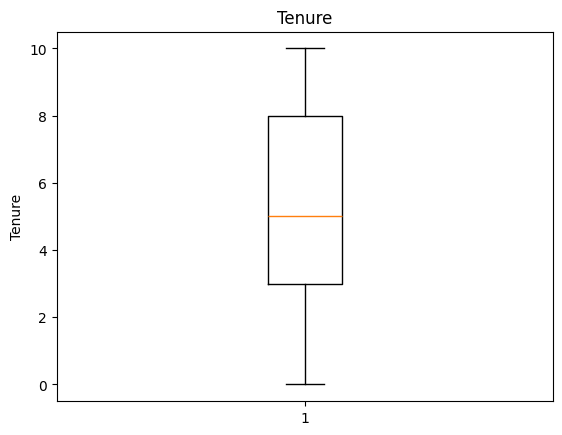

In [10]:
import matplotlib.pyplot as plt

plt.boxplot(df['Tenure'])
plt.title('Tenure')
plt.ylabel('Tenure')
plt.show()

In [11]:
print(df['Tenure'].min())
print(df['Tenure'].max())

0
10


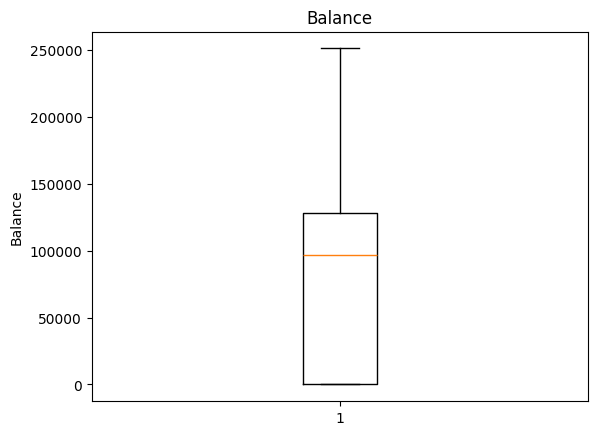

In [12]:
import matplotlib.pyplot as plt

plt.boxplot(df['Balance'])
plt.title('Balance')
plt.ylabel('Balance')
plt.show()

In [13]:
print(df['Balance'].min())
print(df['Balance'].max())

0.0
250898.09


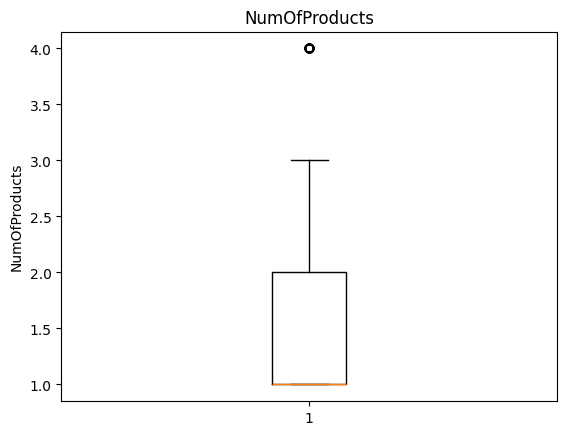

In [14]:
import matplotlib.pyplot as plt 

plt.boxplot(df['NumOfProducts'])
plt.title('NumOfProducts')
plt.ylabel('NumOfProducts')
plt.show()

In [15]:
print(df['NumOfProducts'].min())
print(df['NumOfProducts'].max())

1
4


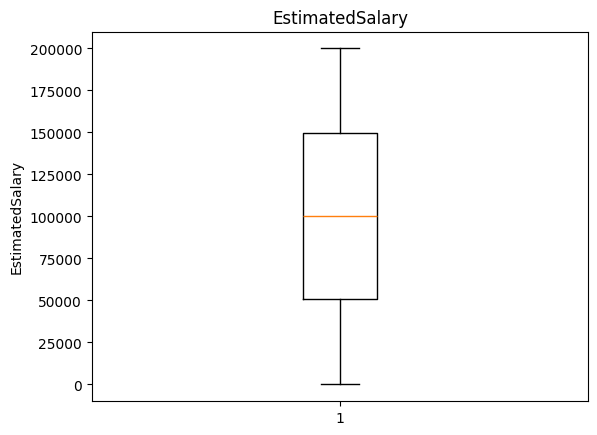

In [16]:
import matplotlib.pyplot as plt

plt.boxplot(df['EstimatedSalary'])
plt.title('EstimatedSalary')
plt.ylabel('EstimatedSalary')
plt.show()

In [17]:
print(df['EstimatedSalary'].min())
print(df['EstimatedSalary'].max())

11.58
199992.48


## Label encoder

In [18]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Surname'] = le.fit_transform(df['Surname'])
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1111,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1173,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2032,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1816,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Separate into train and test

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Exited'])
y = df['Exited'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### MinMaxScaler


In [22]:
scaler = MinMaxScaler()

scaler.fit(X_train) # fit the scaler to the train set

X_train_min_max_scaled = scaler.transform(X_train) # transform the train set
X_test_min_max_scaled = scaler.transform(X_test) # transform the test set

In [23]:
X_train_min_max_scaled

array([[0.35201121, 0.11669547, 0.88507719, ..., 1.        , 0.        ,
        0.34768845],
       [0.60456274, 0.78062996, 0.35849057, ..., 1.        , 0.        ,
        0.46923837],
       [0.89393636, 0.07744496, 0.17495712, ..., 0.        , 1.        ,
        0.56001428],
       ...,
       [0.53922353, 0.03258209, 0.5626072 , ..., 0.        , 0.        ,
        0.46092526],
       [0.08595157, 0.96788994, 0.59691252, ..., 1.        , 0.        ,
        0.48738065],
       [0.7273364 , 0.56228399, 0.84425386, ..., 1.        , 1.        ,
        0.26761502]])

### StandardScaler

In [24]:
scaler = StandardScaler()

scaler.fit(X_train) # fit the scaler to the train set

X_train_std_scaled = scaler.transform(X_train) # transform the train set
X_test_std_scaled = scaler.transform(X_test) # transform the test set

In [25]:
X_train_std_scaled

array([[-0.50073964, -1.33102082,  1.28295781, ...,  0.64920701,
        -1.04034701, -0.53624445],
       [ 0.38340744,  0.98483691, -0.54107698, ...,  0.64920701,
        -1.04034701, -0.11539063],
       [ 1.39646344, -1.46792981, -1.17681548, ..., -1.54034073,
         0.96121774,  0.19891141],
       ...,
       [ 0.15466416, -1.62441517,  0.16595931, ..., -1.54034073,
        -1.04034701, -0.1441739 ],
       [-1.43217667,  1.63801503,  0.28478893, ...,  0.64920701,
        -1.04034701, -0.05257492],
       [ 0.81322062,  0.22322832,  1.14155055, ...,  0.64920701,
         0.96121774, -0.81349026]])

## Testing the model

### With no normalization

In [28]:

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train) # fit the model to the train set (without normalization)

y_pred = model.predict(X_test) # predict on the test set

In [29]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [30]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7567156614292955


### With MinMaxScaler


In [32]:
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train_min_max_scaled, y_train) # fit the model to the train set 

y_pred_min_max = model.predict(X_test_min_max_scaled) # predict on the test set

In [34]:
accuracy = accuracy_score(y_test, y_pred_min_max)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8048656867714141


### With StandardScaler

In [35]:
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train_std_scaled, y_train) # fit the model to the train set

y_pred_std = model.predict(X_test_std_scaled) # predict on the test set

In [36]:
accuracy = accuracy_score(y_test, y_pred_std)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8175367460719716
